
# Statistical Hypothesis Testing

<img align="left" style="padding-right:10px;" width ="200px" src="./img/stats/preface2.png">


The statistics of hypothesis can be thought of as observations of random variables from known distributions, 
- which allows us to make statements about how likely those assumptions are to hold.

- H1: data scientists prefer Python to R. 
- H2: people tends to jump onto the bandwagon of collective gatekeepers.
- H3: media agenda determines the public agenda. 
- H4: the rich people can better use mobile phone compared with the poor. 

## The logic of falsification  

证伪的逻辑

- **Null hypothesis H0** represents some default position 
- **Alternative hypothesis H1** 
    
    - We use statistics to decide whether we can **reject H0** as false or not.

<font size="7" color="red">We do not prove (just support)</font> alternative hypothesis;



<font size="7" color="green">We just support</font> alternative hypothesis when we reject the null hypothesis.

<img align="left" width = 150px style="padding-right:5px;" src="./img/stats/bear.png">
## Example: Flipping a Coin
Imagine we have a coin and we want to test whether it’s fair. 

**Null hypothesis H0**: The coin is fair. 
- The probability of landing heads is 0.5
- The alternative hypothesis p ≠ 0.5

Each coin flip is a Bernoulli trial, 
- X is a Binomial(n,p) random variable
- we can approximate X using the normal distribution:

In [9]:
from probability import normal_cdf, inverse_normal_cdf
import math, random

In [2]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

Whenever a random variable follows a normal distribution, we can use **normal_cdf** to figure out the probability that its realized value lies within (or outside) a particular interval:

In [18]:
# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

In [13]:
# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)


## Lower and Upper Bunds 上、下边界
We can also find either the nontail region or the (symmetric) interval around the mean that accounts for a certain level of likelihood. 

For example, if we want to find an interval centered at the mean and containing 60% probability
- we find the cutoffs where the upper and lower tails each contain 20% of the probability (leaving 60%):

In [14]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

In [15]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In particular, when we choose to flip the coin n = 1000 times. 
If our hypothesis of fairness is true, 
- X should be distributed approximately normally 
    - with mean 500 and
    - standard deviation 15.8

In [66]:
import numpy as np
np.sqrt(1000*0.5*(1-0.5))

15.811388300841896

In [8]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print("mu_0", mu_0)
print("sigma_0", sigma_0)

mu_0 500.0
sigma_0 15.811388300841896


# Type 1 Error and Type 2 Error

对于原假设H0，容易犯的两类错误：Type 1“弃真”或 Type 2“纳伪”？

We need to make a decision about **significance**:
<font size = '6' color = 'red'>How willing we are to make a **type 1 error** (“false positive”), in which we reject H0 even though it’s true.</font> 

Assuming **p** really equals 0.5 (i.e., H0 is true), there is just a 5% chance we observe an X that lies outside this interval, which is the exact significance we wanted. 

if H0 is true, approximately 19 times out of 20, this test will give the correct result.

In [12]:
print("normal_two_sided_bounds(0.95, mu_0, sigma_0)")
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print("power of a test")
print("95% bounds based on assumption p is 0.5")
print("lo", lo)
print("hi", hi)

normal_two_sided_bounds(0.95, mu_0, sigma_0)
power of a test
95% bounds based on assumption p is 0.5
lo 469.01026640487555
hi 530.9897335951244


### Power of a test
- the probability of not making a type 2 error, 
- in which we fail to reject H0 even though it’s false. 

Let’s check what happens if p is really 0.55:

In [16]:
print("actual mu and sigma based on p = 0.55")
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print("mu_1", mu_1)
print("sigma_1", sigma_1)
print("Now, the coin is slightly biased toward heads.")

actual mu and sigma based on p = 0.55
mu_1 550.0
sigma_1 15.732132722552274
Now the coin is slightly biased toward heads.


In [18]:
# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability # 0.887

print("type 2 probability", type_2_probability)
print("power", power)


type 2 probability 0.0636203880618903
power 0.9363796119381097


### One-sided test

Assume that:

**null hypothesis** H0 was that `the coin is not biased toward heads, or that p ≤ 0.5.`

In that case we want a one-sided test that rejects the null hypothesis when X is much larger than 500 but not when X is smaller than 500. 

In [19]:
print("one-sided test")
hi = normal_upper_bound(0.95, mu_0, sigma_0)

print("hi", hi) # is 526 (< 531, since we need more probability in the upper tail)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability # = 0.936
print("type 2 probability", type_2_probability)
print("power", power)

one-sided test
hi 526.0073585242053
type 2 probability 0.06362051966928273
power 0.9363794803307173


This is a **more powerful** test, since 
- it no longer rejects H0 when X is below 469
    - which is very unlikely to happen if H1 is true
- it instead rejects H0 when X is between 526 and 531 
    - which is somewhat likely to happen if H1 is true

In [16]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is above x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is below x
        return 2 * normal_probability_below(x, mu, sigma)

In [25]:
# If we were to see 530 heads, we would compute:
print("two_sided_p_value(529.5, mu_0, sigma_0) is ", \
      two_sided_p_value(529.5, mu_0, sigma_0))


two_sided_p_value(529.5, mu_0, sigma_0) is  0.06207721579598857


**Why did we use 529.5 instead of 530? **
- This is what’s called a [continuity correction](https://en.wikipedia.org/wiki/Continuity_correction#Binomial). 连续性校正
- `normal_probability_between(529.5, 530.5, mu_0, sigma_0)` is a better estimate of the probability of seeing 530 heads than `normal_probabil ity_between(530, 531, mu_0, sigma_0)` is.

One way to convince yourself that this is a sensible estimate is with a simulation:

In [35]:
def count_extreme_values():
    extreme_value_count = 0
    for _ in range(100000):
        num_heads = sum(1 if random.random() < 0.5 else 0    # count # of heads
                        for _ in range(1000))                # in 1000 flips
        if num_heads >= 530 or num_heads <= 470:             # and count how often
            extreme_value_count += 1                         # the # is 'extreme'

    return extreme_value_count / 100000

In [38]:
count_extreme_values() # 0.062

0.06118

Since the p-value is greater than our 5% significance, we don’t reject the null. 

In [28]:
print("two_sided_p_value(531.5, mu_0, sigma_0) is ",\
      two_sided_p_value(531.5, mu_0, sigma_0))

two_sided_p_value(531.5, mu_0, sigma_0) is  0.046345287837786575


It is smaller than the 5% significance, and we would reject the null.

For our one-sided test, if we saw 525 heads we would compute:

In [39]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [42]:
upper_p_value(524.5, mu_0, sigma_0) # 0.061
# wouldn’t reject the null.

0.06062885772582083

For our one-sided test, if we saw 527 heads we would compute:

In [41]:
upper_p_value(526.5, mu_0, sigma_0) # 0.047
# we would reject the null.

0.04686839508859242



<img align="left" style="padding-right:10px;" src="./img/stats/danger.png">


Make sure your **data is roughly normally distributed** before using normal_probability_above to compute p-values.

- There are various statistical tests for normality, 
- but even plotting the data is a good start.


# Confidence Intervals

> to construct a confidence interval around the observed value of the parameter.


**Example**

We can estimate the probability of the unfair coin by looking at the average value of the Bernoulli variables corresponding to each flip
- 1 if heads, 
- 0 if tails. 

If we observe 525 heads out of 1,000 flips, then we estimate `p equals 0.525`.

How confident can we be about this estimate? 


If we knew the exact value of p, the `central limit theorem` tells us 
> the average of those Bernoulli variables should be approximately normal, with mean p and standard deviation $\sigma = \sqrt{p(1 - p) / 1000}$:

In [69]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat)/ 1000) # 0.0158

print(mu, sigma)

0.525 0.015791611697353755


we are “95% confident” that the following interval contains the true parameter p:

In [47]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

<img align="left" style="padding-right:10px;" src="./img/stats/bird.png">
if you were to repeat the experiment many times, 95% of the time the “true” parameter (which is the same every time) would lie within the observed confidence interval (which might be different every time).

we do not conclude that the coin is unfair, since 0.5 falls within our confidence interval.

If instead we’d seen 540 heads, then we’d have:

In [70]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) 
print(mu, sigma, normal_two_sided_bounds(0.95, mu, sigma) )

0.54 0.015760710643876435 (0.5091095927295919, 0.5708904072704082)


Here, “fair coin” doesn’t lie in the confidence interval. 
- The “fair coin” hypothesis doesn’t pass a test that you’d expect it to pass 95% of the time if it were true.

# P-hacking P值操纵


- Test enough hypotheses against your data set, and one of them will almost certainly appear significant. 
- Remove the right outliers, and you can probably get your p value below 0.05.

<img align="left" style="padding-right:10px;" src="./img/stats/danger.png">

P-hacking是科研人员不断的尝试统计计算直到p<.05，当然有时这可能是无意识的。
- 最早应该是美国宾夕法尼亚大学的Simmons等人提出来的。
- P-hacking 按照字面的意思来看是「P值黑客]，但是实际上的意思是「P值篡改」或者「P值操纵」。
- P-hacking危害很明显，那就是很容易引起假阳性，导致实验的不可重复性

> Simmons JP, Nelson LD, Simonshohn U. False-positive psychology: undisclosed flexibility in data collection and analysis allows presenting anything as significant. Psychol Sci. 2011 Nov;22(11):1359-66.

In [51]:
def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [53]:
print("P-hacking")

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])
print(num_rejections) # 46

P-hacking
46


<img align="left" style="padding-right:10px;" src="./img/stats/bird.png">
- you should determine your hypotheses before looking at the data, 
- you should clean your data without the hypotheses in mind, and 
- you should keep in mind that p-values are not substitutes for common sense. 

<img align="left" width = 100px style="padding-right:5px;" src="./img/stats/bear.png">
# Example: Running an A/B Test

To help choosing between advertisement A (“tastes great!”) and advertisement B (“less bias!”).

If 990 out of 1,000 A-viewers click their ad while only 10 out of 1,000 B-viewers click their ad, you can be pretty confident that A is the better ad. 

But what if the differences are not so stark? 
- Here’s where you’d use statistical inference.

Let’s say that $N_A$ people see ad A, and that $n_A$ of them click it.
- We can think of each ad view as a Bernoulli trial 
    - where $p_A$ is the probability that someone clicks ad A. 
    
$\frac{n_A}{N_A}$ is approximately a normal random variable with mean $p_A$ and standard deviation $\sigma_A$

$$\sigma_A = \sqrt \frac{P_A(1-P_A)}{N_A}$$ 

Similarly,

$$\sigma_B = \sqrt \frac{P_B(1-P_B)}{N_B}$$ 

In [6]:
# running an A/B test
def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

If we assume those two normals are independent (which seems reasonable, since the individual Bernoulli trials ought to be), then their difference should also be normal with 
- mean $p_B − p_A$ 
- standard deviation $\sqrt {\sigma_A^2 + \sigma_B^2}$.

Null Hypothesis: $p_A$ and $p_B$ are the same, that is $p_A - p_B = 0$

In [7]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

# it should approximately be a standard normal.

For example, if “tastes great” gets 200 clicks out of 1,000 views and “less bias” gets 180 clicks out of 1,000 views, the statistic equals:

In [21]:
num_rejections = 1000
print(num_rejections, "rejections out of 1000")
print("A/B testing")

z = a_b_test_statistic(1000, 200, 1000, 180)
print("a_b_test_statistic(1000, 200, 1000, 180)", z)
print("p-value", two_sided_p_value(z))
print('which is large enough that you can’t conclude there’s much of a difference. ')

1000 rejections out of 1000
A/B testing
a_b_test_statistic(1000, 200, 1000, 180) -1.1403464899034472
p-value 0.254141976542236
which is large enough that you can’t conclude there’s much of a difference. 


On the other hand, if “less bias” only got 150 clicks, we’d have:


In [22]:
z = a_b_test_statistic(1000, 200, 1000, 150)
print("a_b_test_statistic(1000, 200, 1000, 150)", z)
print("p-value", two_sided_p_value(z))


a_b_test_statistic(1000, 200, 1000, 150) -2.948839123097944
p-value 0.003189699706216853


- it means there’s only a 0.003 probability you’d see such a large difference if the ads were equally effective.
- there’s only a .3% chance you’d observe such an extreme statistic if our null hypothesis were true.

# Bayesian Inference

An alternative approach to inference involves treating the unknown parameters themselves as random variables. 

- To start with a `prior distribution` for the parameters 
- and then uses the observed data and Bayes’s Theorem to get an updated `posterior distribution` for the parameters. 

For example, when the unknown parameter is a probability (as in our coin-flipping example), we often use a `prior` from the `Beta distribution`, which puts all its probability between 0 and 1:


In [24]:
def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

The larger alpha and beta are, the “tighter” the distribution is.

- if alpha and beta are both 1, it’s just the uniform distribution (centered at 0.5, very dispersed). 
- If alpha is much larger than beta, most of the weight is near 1.
- if alpha is much smaller than beta, most of the weight is near zero. 

In [51]:
x = [i*10/1000 for i in range(101)]
y1 = [beta_pdf(i, 1, 1) for i in x]
y2 = [beta_pdf(i, 10, 10) for i in x]
y3 = [beta_pdf(i, 4, 16) for i in x]
y4 = [beta_pdf(i, 16, 4) for i in x]

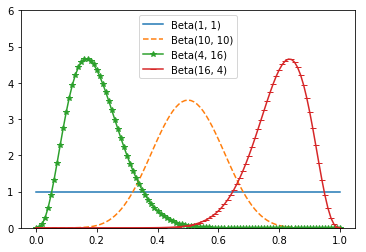

In [56]:
import matplotlib.pyplot as plt 

plt.plot(x, y1, label = 'Beta(1, 1)')
plt.plot(x, y2, '--', label = 'Beta(10, 10)')
plt.plot(x, y3, '-*', label = 'Beta(4, 16)')
plt.plot(x, y4, '_-', label = 'Beta(16, 4)')
plt.legend(loc=0,numpoints=1,fontsize=10)
plt.ylim(0, 6)
plt.show()

So let’s say we assume a prior distribution on p. 
- Maybe we don’t want to take a stand on whether the coin is fair, and we choose alpha and beta to both equal 1. 
- Or maybe we have a strong belief that it lands heads 55% of the time, and we choose alpha equals 55, beta equals 45.

Then we flip our coin a bunch of times and see h heads and t tails. 
- Bayes’s Theorem tells us that the posterior distribution for p is again a Beta distribution 
    - but with parameters alpha + h and beta + t.
    
    

<img align="left" style="padding-right:10px;" src="figures/bird.png">
Beta is the conjugate prior (共轭先验) to the Binomial distribution. 

Whenever you update a Beta prior using observations from the corresponding binomial, you will get back a Beta posterior.

Let’s say you flip the coin 10 times and see only 3 heads.

- If you started with the uniform prior, your posterior distribution would be a Beta(4, 8), centered around 0.33. 
    - Since you considered all probabilities equally likely, your best guess is something pretty close to the observed probability.
    
    

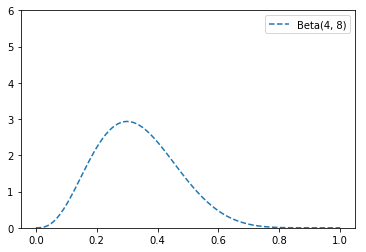

In [61]:
y5 = [beta_pdf(i, 4, 8) for i in x]
plt.plot(x, y5, '--', label = 'Beta(4, 8)')
plt.legend(loc=0,numpoints=1,fontsize=10)
plt.ylim(0, 6)
plt.show()

- If you started with a Beta(20, 20) 
    - expressing the belief that the coin was roughly fair
    - your posterior distribution would be a Beta(23, 27), centered around 0.46, 
    - indicating a revised belief that maybe the coin is slightly biased toward tails.
    

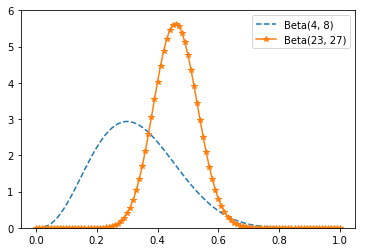

In [60]:
y5 = [beta_pdf(i, 4, 8) for i in x]
y6 = [beta_pdf(i, 23, 27) for i in x]

plt.plot(x, y5, '--', label = 'Beta(4, 8)')
plt.plot(x, y6, '-*', label = 'Beta(23, 27)')
plt.legend(loc=0,numpoints=1,fontsize=10)
plt.ylim(0, 6)
plt.show()

- And if you started with a Beta(30, 10) 
    - expressing a belief that the coin was biased to flip 75% heads
    - your posterior distribution would be a Beta(33, 17), centered around 0.66. 
    - In that case you’d still believe in a heads bias, but less strongly than you did initially. 

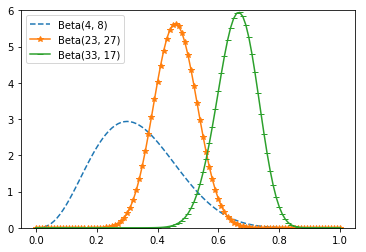

In [58]:
y5 = [beta_pdf(i, 4, 8) for i in x]
y6 = [beta_pdf(i, 23, 27) for i in x]
y7 = [beta_pdf(i, 33, 17) for i in x]

plt.plot(x, y5, '--', label = 'Beta(4, 8)')
plt.plot(x, y6, '-*', label = 'Beta(23, 27)')
plt.plot(x, y7, '_-', label = 'Beta(33, 17)')
plt.legend(loc=0,numpoints=1,fontsize=10)
plt.ylim(0, 6)
plt.show()

<img align="left" style="padding-right:10px;" src="./img/stats/bird.png">

What’s interesting is that this allows us to make probability statements about hypotheses: 

> “Based on the prior and the observed data, there is only a 5% likelihood the coin’s heads probability is between 49% and 51%.” 

This is philosophically very different from a statement like 
> “if the coin were fair we would expect to observe data so extreme only 5% of the time.”

<img align="left" style="padding-right:10px;" src="./img/stats/bird.png">

- If you flipped the coin more and more times, the prior would matter less and less until eventually you’d have (nearly) the same posterior distribution no matter which prior you started with.

Using Bayesian inference to test hypotheses is considered somewhat controversial— in part because of the subjective nature of choosing a prior. 